## Sistema inteligente con Red neuronal artificial MLP que clasifica si en una imagen hay un gato

https://www.tensorflow.org/tutorials/keras/classification?hl=es-419

Vinculo con github para acceso a comun




In [ ]:
! git clone https://github.com/FNLucero/CatsRecognizer

### Setup inicial

In [2]:
# Se importan las librerias necesarias para el manejo de imágenes y de las RNA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

In [3]:
# Definición del path al dataset y de categorias (etiquetas)
dataset_path = "./datos/"
categories = ["Michis", "No_Michis"]

In [4]:
# Definición de la función para graficar el Error General
def plot_model_loss(trained):
    plt.plot(trained.history['loss'])
    plt.title('Error General')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['loss'], loc='upper right')
    plt.show()

In [5]:
# Definición de la función para graficar la Matriz de Confusión
def plot_confusion_matrix(model, testX, testY):
    pred = model.predict(testX)
    predictions = np.argmax(pred, axis=1) # return to label

    cm = confusion_matrix(testY, predictions)

    fig = plt.figure(figsize=(8, 6), dpi=90)
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Matriz de Confusión')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + categories)
    ax.set_yticklabels([''] + categories)

    for i in range(2):
        for j in range(2):
            ax.text(i, j, cm[j, i], va='center', ha='center')

    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


    accuracy = accuracy_score(testY, predictions)
    print("Accuracy : %.2f%%" % (accuracy*100.0))

### Carga de datos para el Modelo 1

In [6]:
data = []
labels = []
imagePaths = []
HEIGHT = 120
WIDTH = 120
N_CHANNELS = 3

# Carga de imagenes
for k, category in enumerate(categories):
    for f in os.listdir(dataset_path + category):
        imagePaths.append([dataset_path + category + '/' + f, k])

# Se redimencionan las imagenes y se cargan la data y labels
for imagePath in imagePaths:
    image = cv2.imread(imagePath[0])
    image = cv2.resize(image, (WIDTH, HEIGHT))
    data.append(image)
    
    label = imagePath[1]
    labels.append(label)

print('Tamaño dataset: ' + str(len(data)))

Tamaño dataset: 260


In [7]:
# Se transforman data y labels a un array homogeneo
data = np.array(data)
labels = np.array(labels)

### Definición del Modelo 1: Secuencial de 3 capas

In [8]:
model1 = Sequential([                   
    Flatten(input_shape=(HEIGHT, WIDTH, N_CHANNELS)),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')
])

model1.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

model1.save_weights('model.3l')

print(model1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 43200)             0         
                                                                 
 dense (Dense)               (None, 128)               5529728   
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 5,529,986
Trainable params: 5,529,986
Non-trainable params: 0
_________________________________________________________________
None


### Datos para Entrenamiento 1: 25% del total set de datos

In [9]:
# Se obtiene una porcion del set de datos
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25, random_state=39) # random_state nos permite "mezclar" basado en un seed
#trainY = np_utils.to_categorical(trainY, len(categories))

Cantidad de epochs para Entrenamiento 1: 35

In [10]:
trained = model1.fit(trainX, trainY, epochs=35)

Epoch 1/35
7/7 [==============================] - 1s 59ms/step - loss: 5876.5557 - accuracy: 0.5436
Epoch 2/35
7/7 [==============================] - 0s 47ms/step - loss: 1341.0983 - accuracy: 0.5128
Epoch 3/35
7/7 [==============================] - 0s 50ms/step - loss: 393.2432 - accuracy: 0.5436
Epoch 4/35
7/7 [==============================] - 0s 51ms/step - loss: 131.5660 - accuracy: 0.6154
Epoch 5/35
7/7 [==============================] - 0s 48ms/step - loss: 144.8304 - accuracy: 0.5744
Epoch 6/35
7/7 [==============================] - 0s 46ms/step - loss: 58.6682 - accuracy: 0.6667
Epoch 7/35
7/7 [==============================] - 0s 50ms/step - loss: 23.0864 - accuracy: 0.7590
Epoch 8/35
7/7 [==============================] - 0s 49ms/step - loss: 13.9811 - accuracy: 0.8051
Epoch 9/35
7/7 [==============================] - 0s 57ms/step - loss: 13.4181 - accuracy: 0.7795
Epoch 10/35
7/7 [==============================] - 0s 56ms/step - loss: 81.9239 - accuracy: 0.5897
Epoch 11/35


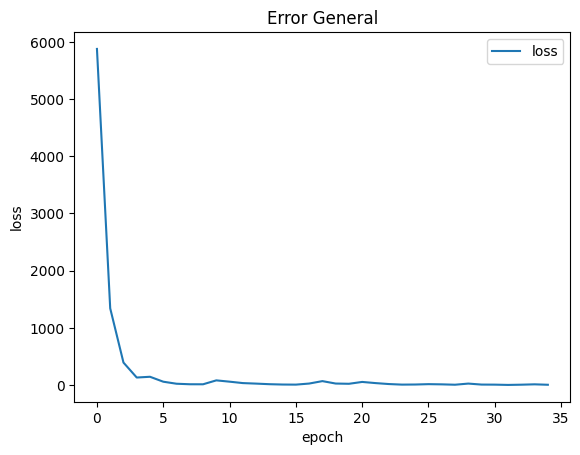

In [11]:
# Graficamos el Error General
plot_model_loss(trained)

3/3 [==============================] - 0s 9ms/step


C:\Users\HD279CW\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]
C:\Users\HD279CW\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


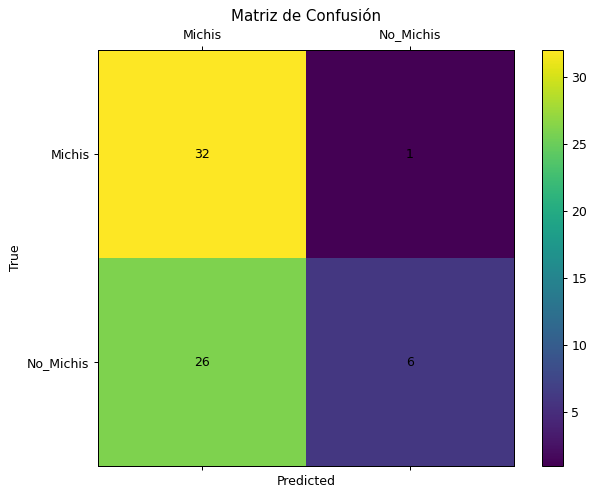

Accuracy : 58.46%


In [12]:
# Graficamos la Matriz de Confusión
plot_confusion_matrix(model1, testX, testY)

In [13]:
# Resetiamos el modelo
model1.load_weights('model.3l')

### Datos para Entrenamiento 2: 80% del total set de datos

In [14]:
# Se obtiene una porcion del set de datos
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.8, random_state=7) # random_state nos permite "mezclar" basado en un seed
#trainY = np_utils.to_categorical(trainY, len(categories))

Cantidad de epochs para Entrenamiento 2: 60

In [15]:
trained = model1.fit(trainX, trainY, epochs=60)

Epoch 1/60
2/2 [==============================] - 0s 82ms/step - loss: 5261.5034 - accuracy: 0.4423
Epoch 2/60
2/2 [==============================] - 0s 75ms/step - loss: 3540.6367 - accuracy: 0.5385
Epoch 3/60
2/2 [==============================] - 0s 44ms/step - loss: 361.9048 - accuracy: 0.5192
Epoch 4/60
2/2 [==============================] - 0s 68ms/step - loss: 82.9002 - accuracy: 0.5769
Epoch 5/60
2/2 [==============================] - 0s 65ms/step - loss: 28.1335 - accuracy: 0.4808
Epoch 6/60
2/2 [==============================] - 0s 73ms/step - loss: 0.5365 - accuracy: 0.4808
Epoch 7/60
2/2 [==============================] - 0s 68ms/step - loss: 0.5069 - accuracy: 0.4808
Epoch 8/60
2/2 [==============================] - 0s 63ms/step - loss: 0.4949 - accuracy: 0.4808
Epoch 9/60
2/2 [==============================] - 0s 64ms/step - loss: 0.6569 - accuracy: 0.4808
Epoch 10/60
2/2 [==============================] - 0s 75ms/step - loss: 0.4931 - accuracy: 0.8077
Epoch 11/60
2/2 [==

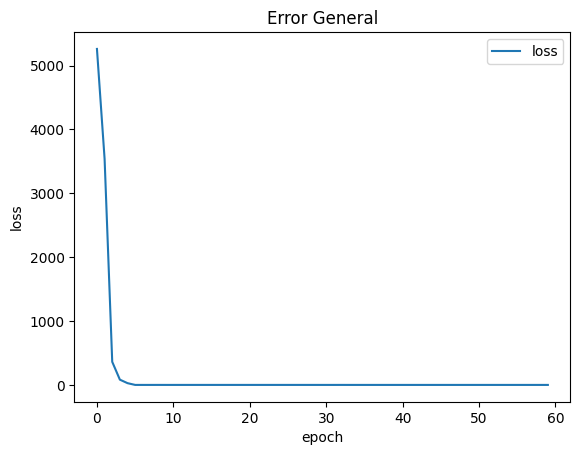

In [16]:
# Graficamos el Error General
plot_model_loss(trained)

7/7 [==============================] - 0s 14ms/step


C:\Users\HD279CW\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]
C:\Users\HD279CW\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


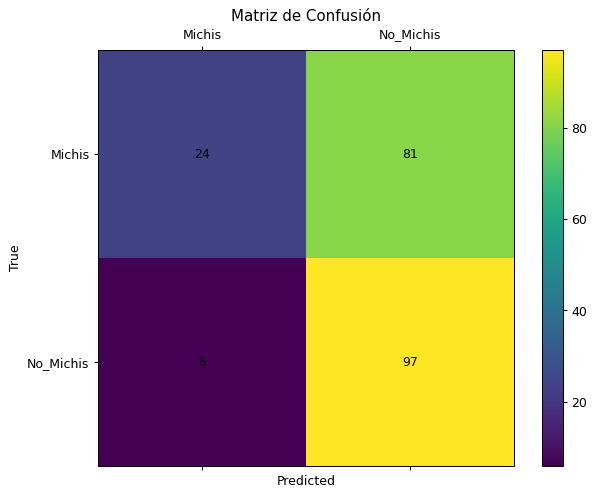

Accuracy : 58.17%


In [17]:
# Graficamos la Matriz de Confusión
plot_confusion_matrix(model1, testX, testY)

### Definición del Modelo 2: Secuencial de 8 capas

In [18]:
model2 = Sequential([
    Convolution2D(32, (2, 2), activation='relu', input_shape=(HEIGHT, WIDTH, N_CHANNELS)),
    MaxPooling2D(pool_size=(2, 2)),
    Convolution2D(32, (2, 2), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(categories), activation='softmax')
])

model2.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 119, 119, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 59, 59, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 58, 58, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 29, 29, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 29, 29, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 26912)            

### Datos para Entrenamiento 3: 50% del total set de datos

In [19]:
# Se obtiene una porcion del set de datos
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.5, random_state=204) # random_state nos permite "mezclar" basado en un seed
trainY = np_utils.to_categorical(trainY, len(categories))

Cantidad de epochs para Entrenamiento 3: 25

In [20]:
trained = model2.fit(trainX, trainY, epochs=25)

Epoch 1/25
5/5 [==============================] - 2s 245ms/step - loss: 317.0383 - accuracy: 0.5462
Epoch 2/25
5/5 [==============================] - 1s 218ms/step - loss: 196.6606 - accuracy: 0.5462
Epoch 3/25
5/5 [==============================] - 1s 211ms/step - loss: 119.4874 - accuracy: 0.5462
Epoch 4/25
5/5 [==============================] - 1s 200ms/step - loss: 45.1137 - accuracy: 0.5923
Epoch 5/25
5/5 [==============================] - 1s 232ms/step - loss: 21.8849 - accuracy: 0.6231
Epoch 6/25
5/5 [==============================] - 1s 204ms/step - loss: 12.9617 - accuracy: 0.6077
Epoch 7/25
5/5 [==============================] - 1s 192ms/step - loss: 4.0955 - accuracy: 0.7231
Epoch 8/25
5/5 [==============================] - 1s 189ms/step - loss: 0.6812 - accuracy: 0.8846
Epoch 9/25
5/5 [==============================] - 1s 193ms/step - loss: 0.3238 - accuracy: 0.9000
Epoch 10/25
5/5 [==============================] - 1s 202ms/step - loss: 0.1784 - accuracy: 0.9615
Epoch 11/2

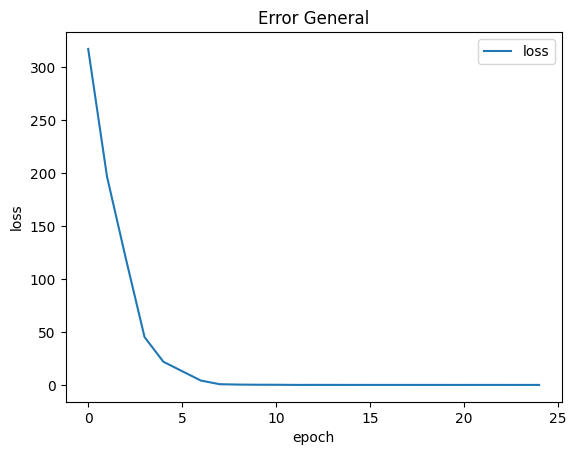

In [21]:
# Graficamos el Error General
plot_model_loss(trained)

5/5 [==============================] - 1s 72ms/step


C:\Users\HD279CW\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]
C:\Users\HD279CW\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


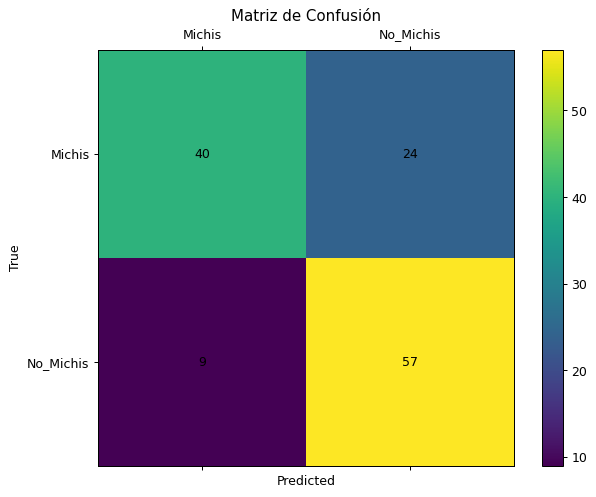

Accuracy : 74.62%


In [22]:
# Graficamos la Matriz de Confusión
plot_confusion_matrix(model2, testX, testY)

### Predicciones

Pruebas manuales para corroborar el funcionamiento de los modelos de Red Neuronal Artificial creados

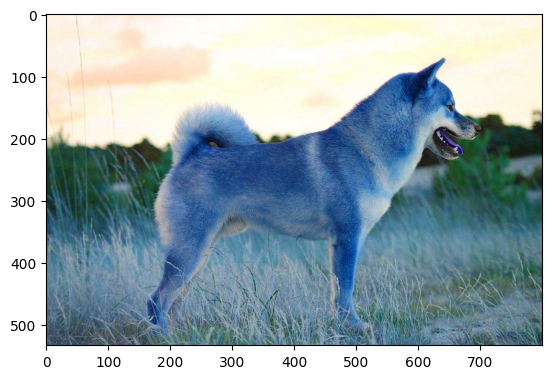

1/1 [==============================] - 0s 46ms/step
> Etiqueta:  No_Michis


In [23]:
img_a_predecir = cv2.imread('./datos/pruebas/shiba.jpg')

plt.imshow(img_a_predecir)
plt.show()

img_a_predecir = cv2.resize(img_a_predecir, (WIDTH, HEIGHT))
img_a_predecir = np.expand_dims(img_a_predecir, 0)

predictions_single = model2.predict(img_a_predecir)
print("> Etiqueta: ", categories[np.argmax(predictions_single)])